###Importing Libraries
* Numpy - matrix operations
* Pandas - to read datasets
* Matplotlib - to plot graphs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from math import sqrt
from math import exp
import pandas as pd
import matplotlib.patches as mpl_patches
import matplotlib.patches as Ellipse

###Extracting datasets from google drive

In [ ]:
dataset=3
url_train = 'https://drive.google.com/file/d/1DjqPrB7JgayDHFAAYpTdyUPYZaUt-RR8/view?usp=sharing'
path_train = 'https://drive.google.com/uc?export=download&id='+url_train.split('/')[-2]
dataset_train = pd.read_csv(path_train)
url_test = 'https://drive.google.com/file/d/1hUidha9yV44-f3wvdDZY7_Ter-0X6051/view?usp=sharing'
path_test = 'https://drive.google.com/uc?export=download&id='+url_test.split('/')[-2]
dataset_test = pd.read_csv(path_test)
dataset=2
url_train = 'https://drive.google.com/file/d/1QXB-aoweBMZQGfVAzFBnyWGF1Sl42iUd/view?usp=sharing'
path_train = 'https://drive.google.com/uc?export=download&id='+url_train.split('/')[-2]
dataset_train = pd.read_csv(path_train)
url_test = 'https://drive.google.com/file/d/1vU3q3JUqcZ641pJqpV-hc_aaohY1r3WX/view?usp=sharing'
path_test = 'https://drive.google.com/uc?export=download&id='+url_test.split('/')[-2]
dataset_test = pd.read_csv(path_test)

**Setting up train data**

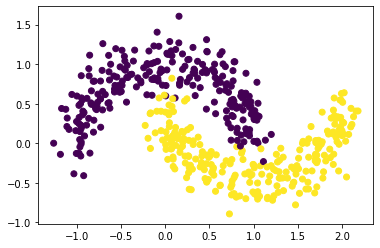

In [ ]:
data_train = dataset_train.to_numpy()
X = data_train[:,0]
Y = data_train[:,1]
label = data_train[:,2]
points = data_train[:,[0,1,2]]
plt.scatter(X,Y,c=label)
zeroes=np.array([[]])
ones=np.array([[]])
twos=np.array([[]])
for i in points:
  if i[2]==0:
    zeroes = np.append(zeroes,[i], axis=1)
  elif i[2]==1:
    ones=np.append(ones,[i],axis=1)
  elif i[2]==2:
    twos=np.append(twos,[i],axis=1)
zeroes=np.reshape(zeroes,(zeroes.shape[1]//3,3))
ones=np.reshape(ones,(ones.shape[1]//3,3))
twos=np.reshape(twos,(twos.shape[1]//3,3))

In [ ]:
#calculating the parameters for prediction
def parameters(data):
  mean_1=np.mean(data[:,0])
  mean_2=np.mean(data[:,1])
  features=np.transpose(data[:,[0,1]])
  cov=np.cov(features)
  return(mean_1,mean_2,cov)

Xmean0,Ymean0,covzero=parameters(zeroes)
Xmean1,Ymean1,covone=parameters(ones)
if len(twos)>0:
  Xmean2,Ymean2,covtwo=parameters(twos)


In [ ]:
def prediction(x,mean_1,mean_2,cov):
  cov_det=np.linalg.det(cov)
  cov_inv=np.linalg.inv(cov)
  arr=np.array([mean_1,mean_2])
  x=np.array(x)
  meanarr=np.subtract(x,arr)
  z=np.matmul(np.matmul(meanarr,cov_inv),np.transpose(meanarr))
  prob=((1/((2*np.pi)*(cov_det**0.5)))*(np.exp(-z/2)))
  return(prob)

def pred_labels_2(X_test,cov1,cov2):
    pred=[]
    for i in X_test:
      if prediction(i,Xmean0,Ymean0,cov1)>prediction(i,Xmean1,Ymean1,cov2):
        pred+=[0]
        plt.scatter(i[0],i[1],c='green')
      else:
        pred+=[1]
        plt.scatter(i[0],i[1],c='yellow')
    plt.show()
    return(pred)
    

def accuracy(label_pred,label):
  count=0
  for i in range(len(label)):
    if label[i]==label_pred[i]:
      count+=1
  return(count*100/len(label))

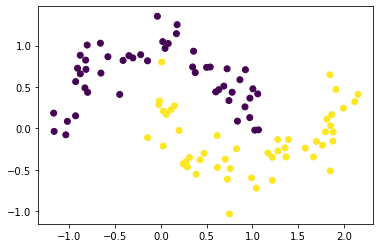

In [ ]:
#Visualising test data before it runs through classifier
test_data = dataset_test.to_numpy()
X_test = test_data[:,[0,1]]
Y_test = test_data[:,1]
label_test = test_data[:,2]

plt.scatter(X_test[:,0],Y_test,c=label_test)
plt.show()

In [ ]:
x_min, x_max = np.round(X.min())-0.5, np.round(X.max()+0.5)
y_min, y_max = np.round(Y.min())-0.5, np.round(Y.max()+0.5)
if dataset==2:
  x_axis_range = np.arange(x_min,x_max, 0.01)
  y_axis_range = np.arange(y_min,y_max, 0.01)
else:
  x_axis_range = np.arange(x_min,x_max, 0.1)
  y_axis_range = np.arange(y_min,y_max, 0.1)
xx, yy = np.meshgrid(x_axis_range, y_axis_range)
mesh_points = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
def confusion_matrix(true_labels, predicted_labels):
  matrix_dim = len(np.unique(true_labels))
  confusion_matrix = np.zeros((matrix_dim,matrix_dim))
  for i in range(len(predicted_labels)):
    a = int(predicted_labels[i])
    b = int(true_labels[i])
    confusion_matrix[a,b] = confusion_matrix[a,b]+1
  print(confusion_matrix)

In [ ]:
def plot_ellipse(alpha,colorlines):
  for i, (mean, cov) in enumerate(zip(means, covariances)):
    eigvals, eigvecs = np.linalg.eigh(cov)
    major_axis = np.sqrt(eigvals[0]) * alpha
    minor_axis = np.sqrt(eigvals[1]) * alpha
    # Find the angle of rotation of the ellipse
    angle = np.arctan2(eigvecs[1,0], eigvecs[0,0]) * 180 / np.pi
    # Create the ellipse object
    ell1 = mpl_patches.Ellipse(mean, width=major_axis, height=minor_axis, angle=angle, fill=False, edgecolor=colorlines[i])
    plt.gca().add_artist(ell1)

#Solutions to each question

77.8
[[193.  54.]
 [ 57. 196.]]
78.0
[[38. 10.]
 [12. 40.]]


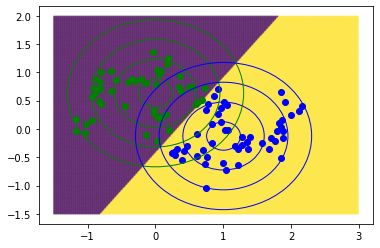

In [ ]:
#Q2
if dataset==2:
  I=np.eye(2)
  #train accuracy
  pred_train=[]
  for i in points[:,[0,1]]:
    p0=prediction(i,Xmean0,Ymean0,I)
    p1=prediction(i,Xmean1,Ymean1,I)

    if p0>p1:
      pred_train+=[0]
    else:
      pred_train+=[1]
  print(accuracy(pred_train,points[:,2]))
  confusion_matrix(points[:,2],pred_train)

  #Print decision boundary
  mesh_pred = []
  for i in mesh_points:
    p0=prediction(i,Xmean0,Ymean0,I)
    p1=prediction(i,Xmean1,Ymean1,I)

    if p0>p1:
      mesh_pred+=[0]
    else:
      mesh_pred+=[1]
  plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred, s=0.1, alpha = 0.5)

  #test accuracy
  I=np.eye(2)
  pred=[]
  for i in X_test:
    if prediction(i,Xmean0,Ymean0,I)>prediction(i,Xmean1,Ymean1,I):
      pred+=[0]
      plt.scatter(i[0],i[1],c='green')
    else:
      pred+=[1]
      plt.scatter(i[0],i[1],c='blue')
  print(accuracy(pred,label_test))
  confusion_matrix(label_test,pred)

  #Plotting the contour ellipses
  means = np.array([[Xmean0, Ymean0],[Xmean1, Ymean1]])
  covariances = np.array([I,I])
  ellipse_range = np.arange(0.5,3,0.7)
  for i in ellipse_range:
    plot_ellipse(i,['green','blue'])
  plt.show()

88.6
[[219.  26.]
 [ 31. 224.]]
86.0
[[43.  7.]
 [ 7. 43.]]


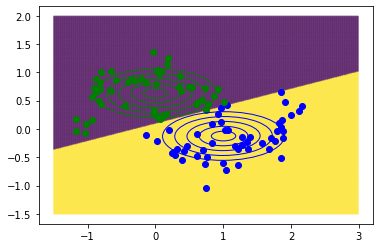

In [ ]:
#Q4
if dataset==2:
  I=np.eye(2)
  #train accuracy
  pred_train=[]
  for i in points[:,[0,1]]:
    p0=prediction(i,Xmean0,Ymean0,covone)
    p1=prediction(i,Xmean1,Ymean1,covone)

    if p0>p1:
      pred_train+=[0]
    else:
      pred_train+=[1]
  print(accuracy(pred_train,points[:,2]))
  confusion_matrix(points[:,2],pred_train)
  #Print decision boundary
  mesh_pred = []
  for i in mesh_points:
    p0=prediction(i,Xmean0,Ymean0,covone)
    p1=prediction(i,Xmean1,Ymean1,covone)

    if p0>p1:
      mesh_pred+=[0]
    else:
      mesh_pred+=[1]
  plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred, s=0.1, alpha = 0.5)
  #test accuracy
  pred=[]
  for i in X_test:
    if prediction(i,Xmean0,Ymean0,covone)>prediction(i,Xmean1,Ymean1,covone):
      pred+=[0]
      plt.scatter(i[0],i[1],c='green')
    else:
      pred+=[1]
      plt.scatter(i[0],i[1],c='blue')
  print(accuracy(pred,label_test))
  confusion_matrix(label_test,pred)

  #Plotting the contour ellipses
  means = np.array([[Xmean0, Ymean0],[Xmean1, Ymean1]])
  covariances = np.array([covone,covone])
  ellipse_range = np.arange(0.5,3,0.5)
  for i in ellipse_range:
    plot_ellipse(i,['green','blue'])
  plt.show()

87.8
[[217.  28.]
 [ 33. 222.]]
86.0
[[43.  7.]
 [ 7. 43.]]


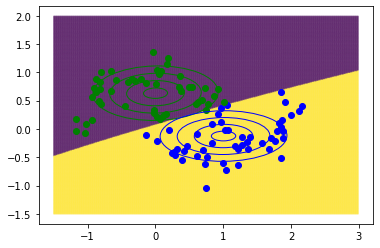

In [ ]:
#Q6
if dataset==2:
  I=np.eye(2)
  #train accuracy
  pred_train=[]
  for i in points[:,[0,1]]:
    p0=prediction(i,Xmean0,Ymean0,covzero)
    p1=prediction(i,Xmean1,Ymean1,covone)

    if p0>p1:
      pred_train+=[0]
    else:
      pred_train+=[1]
  print(accuracy(pred_train,points[:,2]))
  confusion_matrix(points[:,2],pred_train)

  #Print decision boundary
  mesh_pred = []
  for i in mesh_points:
    p0=prediction(i,Xmean0,Ymean0,covzero)
    p1=prediction(i,Xmean1,Ymean1,covone)

    if p0>p1:
      mesh_pred+=[0]
    else:
      mesh_pred+=[1]
  plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred, s=0.1, alpha = 0.5)

  #test accuracy
  pred=[]
  for i in X_test:
    if prediction(i,Xmean0,Ymean0,covzero)>prediction(i,Xmean1,Ymean1,covone):
      pred+=[0]
      plt.scatter(i[0],i[1],c='green')
    else:
      pred+=[1]
      plt.scatter(i[0],i[1],c='blue')
  print(accuracy(pred,label_test))
  confusion_matrix(label_test,pred)

  #Plotting the contour ellipses
  means = np.array([[Xmean0, Ymean0],[Xmean1, Ymean1]])
  covariances = np.array([covzero,covone])
  ellipse_range = np.arange(0.5,3,0.7)
  for i in ellipse_range:
    plot_ellipse(i,['green','blue'])
  plt.show()

98.6
[[167.   0.   0.]
 [  0. 163.   3.]
 [  0.   4. 163.]]
100.0
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]


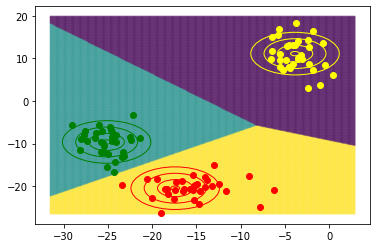

In [ ]:
#Q1
if dataset==3:
  I=np.eye(2)
  #train accuracy
  pred_train=[]
  for i in points[:,[0,1]]:
    p0=prediction(i,Xmean0,Ymean0,I)
    p1=prediction(i,Xmean1,Ymean1,I)
    p2=prediction(i,Xmean2,Ymean2,I)

    if p0>p1 and p0>p2:
      pred_train+=[0]
    elif p1>p0 and p1>p2:
      pred_train+=[1]
    else:
      pred_train+=[2]
  print(accuracy(pred_train,points[:,2]))
  confusion_matrix(points[:,2],pred_train)

  #Print decision boundary
  mesh_pred = []
  for i in mesh_points:
    p0=prediction(i,Xmean0,Ymean0,I)
    p1=prediction(i,Xmean1,Ymean1,I)
    p2=prediction(i,Xmean2,Ymean2,I)

    if p0>p1 and p0>p2:
      mesh_pred+=[0]
    elif p1>p0 and p1>p2:
      mesh_pred+=[1]
    else:
      mesh_pred+=[2]
  plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred, s=0.1, alpha = 0.5)

  #test accuracy
  pred=[]
  #for i in zeroes[:,[0,1]]:

  for i in X_test:
    p0=prediction(i,Xmean0,Ymean0,I)
    p1=prediction(i,Xmean1,Ymean1,I)
    p2=prediction(i,Xmean2,Ymean2,I)

    if p0>p1 and p0>p2:
      plt.scatter(i[0],i[1],c='yellow')
      pred+=[0]
    elif p1>p0 and p1>p2:
      plt.scatter(i[0],i[1],c='green')
      pred+=[1]
    else:
      plt.scatter(i[0],i[1],c='red')
      pred+=[2]
  print(accuracy(pred,label_test))
  confusion_matrix(label_test,pred)

  #Plotting the contour ellipses
  means = np.array([[Xmean0, Ymean0],[Xmean1, Ymean1],[Xmean2,Ymean2]])
  covariances = np.array([I,I,I])
  ellipse_range = np.arange(1,12,3)
  for i in ellipse_range:
    plot_ellipse(i,['yellow','green','red'])
  plt.show()

  # # a=mesh_points[:,0]
  # # b=mesh_points[:,1]
  # # c=np.array(mesh_pred)
  # # print(mesh_points[:,0].shape,mesh_points[:,1].shape, np.array(mesh_pred).shape)
  # # cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  # # plt.pcolormesh(mesh_points[:,0],mesh_points[:,1], np.array(mesh_pred), cmap=cmap_light)
  # cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  # plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred,cmap=cmap_light, s=10)
  # plt.show()

98.0
[[167.   0.   0.]
 [  0. 158.   1.]
 [  0.   9. 165.]]
99.0
[[34.  0.  0.]
 [ 0. 32.  0.]
 [ 0.  1. 33.]]


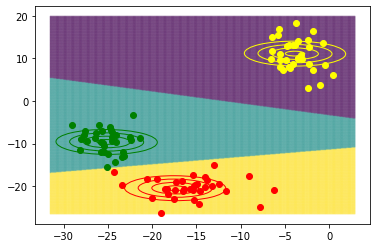

In [ ]:
#Q3
if dataset==3:
  #train accuracy
  pred_train=[]
  for i in points[:,[0,1]]:
    p0=prediction(i,Xmean0,Ymean0,covtwo)
    p1=prediction(i,Xmean1,Ymean1,covtwo)
    p2=prediction(i,Xmean2,Ymean2,covtwo)

    if p0>p1 and p0>p2:
      pred_train+=[0]
    elif p1>p0 and p1>p2:
      pred_train+=[1]
    else:
      pred_train+=[2]
  print(accuracy(pred_train,points[:,2]))
  confusion_matrix(points[:,2],pred_train)

  #Print decision boundary
  mesh_pred = []
  for i in mesh_points:
    p0=prediction(i,Xmean0,Ymean0,covtwo)
    p1=prediction(i,Xmean1,Ymean1,covtwo)
    p2=prediction(i,Xmean2,Ymean2,covtwo)

    if p0>p1 and p0>p2:
      mesh_pred+=[0]
    elif p1>p0 and p1>p2:
      mesh_pred+=[1]
    else:
      mesh_pred+=[2]
  plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred, s=0.1, alpha = 0.4)

  #test accuracy
  pred=[]

  for i in X_test:
    p0=prediction(i,Xmean0,Ymean0,covtwo)
    p1=prediction(i,Xmean1,Ymean1,covtwo)
    p2=prediction(i,Xmean2,Ymean2,covtwo)

    if p0>p1 and p0>p2:
      plt.scatter(i[0],i[1],c='yellow')
      pred+=[0]
    elif p1>p0 and p1>p2:
      plt.scatter(i[0],i[1],c='green')
      pred+=[1]
    else:
      plt.scatter(i[0],i[1],c='red')
      pred+=[2]
  print(accuracy(pred,label_test))
  confusion_matrix(label_test,pred)

  #Plotting the contour ellipses
  means = np.array([[Xmean0, Ymean0],[Xmean1, Ymean1],[Xmean2,Ymean2]])
  covariances = np.array([covtwo,covtwo,covtwo])
  ellipse_range = np.arange(0.5,3,0.7)
  for i in ellipse_range:
    plot_ellipse(i,['yellow','green','red'])
  plt.show()

98.8
[[167.   0.   0.]
 [  0. 163.   2.]
 [  0.   4. 164.]]
100.0
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]


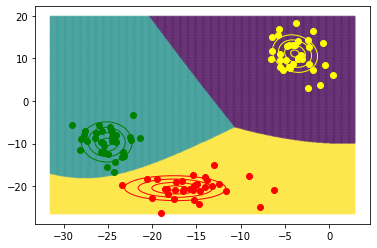

In [ ]:
#Q5
if dataset==3:
  #train accuracy
  pred_train=[]
  for i in points[:,[0,1]]:
    p0=prediction(i,Xmean0,Ymean0,covzero)
    p1=prediction(i,Xmean1,Ymean1,covone)
    p2=prediction(i,Xmean2,Ymean2,covtwo)

    if p0>p1 and p0>p2:
      pred_train+=[0]
    elif p1>p0 and p1>p2:
      pred_train+=[1]
    else:
      pred_train+=[2]
  print(accuracy(pred_train,points[:,2]))
  confusion_matrix(points[:,2],pred_train)

  #Print decision boundary
  mesh_pred = []
  for i in mesh_points:
    p0=prediction(i,Xmean0,Ymean0,covzero)
    p1=prediction(i,Xmean1,Ymean1,covone)
    p2=prediction(i,Xmean2,Ymean2,covtwo)

    if p0>p1 and p0>p2:
      mesh_pred+=[0]
    elif p1>p0 and p1>p2:
      mesh_pred+=[1]
    else:
      mesh_pred+=[2]
  plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_pred, s=0.1, alpha = 0.5)
  
  #test accuracy
  pred=[]
  for i in X_test:
    p0=prediction(i,Xmean0,Ymean0,covzero)
    p1=prediction(i,Xmean1,Ymean1,covone)
    p2=prediction(i,Xmean2,Ymean2,covtwo)

    if p0>p1 and p0>p2:
      plt.scatter(i[0],i[1],c='yellow')
      pred+=[0]
    elif p1>p0 and p1>p2:
      plt.scatter(i[0],i[1],c='green')
      pred+=[1]
    else:
      plt.scatter(i[0],i[1],c='red')
      pred+=[2]
  print(accuracy(pred,label_test))
  confusion_matrix(label_test,pred)

  #Plotting the contour ellipses
  means = np.array([[Xmean0, Ymean0],[Xmean1, Ymean1],[Xmean2,Ymean2]])
  covariances = np.array([covzero,covone,covtwo])
  ellipse_range = np.arange(0.5,3,0.7)
  for i in ellipse_range:
    plot_ellipse(i,['yellow','green','red'])
  plt.show()
  

  plt.show()

###Resources
* https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
* https://www.youtube.com/watch?v=0-jhf-JtPIw



